In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Data

In [8]:
BATCH_SIZE = 64

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,),(0.0381,))])
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True, 
                       transform=transform),
        batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, transform=transform),
        batch_size=BATCH_SIZE, shuffle=True)
classes = list('0123456789')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


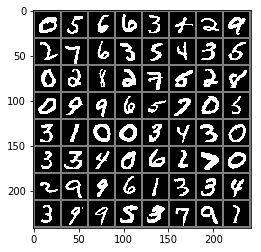

  0   5   6   6   3   4   2   9   2   7   6   3   5   4   3   5   0   2   8   2   7   5   2   8   0   9   9   6   5   7   0   5   3   1   0   0   3   4   3   0   3   3   4   0   6   2   7   0   2   9   9   6   1   3   3   4   3   9   9   5   3   7   9   7


In [16]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%3s' % classes[labels[j]] for j in range(BATCH_SIZE)))

In [18]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 24x24x6
        self.avgpool1 = nn.AvgPool2d(2, 2)  # 12x12x6
        self.conv2 = nn.Conv2d(6, 16, 5) # 8x8x16
        self.avgpool2 = nn.AvgPool2d(2, 2)  # 4x4x16
        self.fc1 = nn.Linear(4*4*16, 128) 
        self.fc2 = nn.Linear(128, 10)
    def forward(self,X):
        out = self.conv1(X) 
        out = F.relu(out)
        out = self.avgpool1(out)  
        out = self.conv2(out) 
        out = F.relu(out)
        out = self.avgpool2(out)
        out = out.view(X.size(0),-1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.log_softmax(out,dim=1)
        return out 

In [20]:
model = LeNet()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

In [33]:
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (avgpool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (avgpool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

## Train

In [36]:
for epoch in range(2):  
    for i,(X_train, y_train) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_func(y_pred, y_train)
        loss.backward()
        optimizer.step()
        if i % 300 == 299:   
            print('Epoch:%d, batch: %5d, loss: %.3f' %
                  (epoch + 1, i + 1, loss.item()))


Epoch:1, batch:   300, loss: 0.003
Epoch:1, batch:   600, loss: 0.028
Epoch:1, batch:   900, loss: 0.076
Epoch:2, batch:   300, loss: 0.001
Epoch:2, batch:   600, loss: 0.001
Epoch:2, batch:   900, loss: 0.003


## Test

In [41]:
loss = 0
correct = 0
with torch.no_grad():
    for X_test, y_test in test_loader:
        y_pred = model(X_test)
        loss += loss_func(y_pred, y_test)
        y_pred = y_pred.max(1, keepdim=True)[1]
        correct += y_pred.eq(y_test.view_as(y_pred)).sum().item()
loss /= len(test_loader.dataset)
print('average loss: %.4f, acc: %d/%d (%.4f)' % (loss, correct, len(test_loader.dataset), correct/len(test_loader.dataset)))

average loss: 0.0005, acc: 9899/10000 (0.9899)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


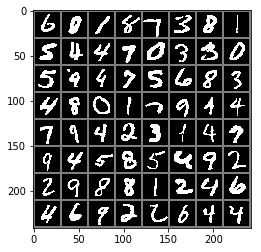

GroundTruth:      6     0     1     8     7     3     8     1     5     4     4     7     0     3     3     0     5     9     4     7     5     6     8     3     4     8     0     1     7     9     4     4     7     9     4     2     3     1     4     7     9     4     5     8     5     4     9     2     2     9     8     8     1     2     4     6     4     6     9     2     2     6     4     4


In [26]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))


In [28]:
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(BATCH_SIZE)))

Predicted:      6     0     1     8     7     3     8     1     5     4     4     7     0     3     3     0     5     9     9     7     5     6     8     3     4     8     0     1     7     9     4     4     7     9     4     2     3     1     4     7     9     4     5     8     5     4     9     2     2     9     8     8     1     2     4     6     4     6     9     2     0     6     4     4
